In [1]:
!ls

camera_callibration.py	marker_detection.py   __pycache__
feature_extractor.py	objloader_simple.py   square_detection.py
main.py			projection_matrix.py  test.ipynb


In [10]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

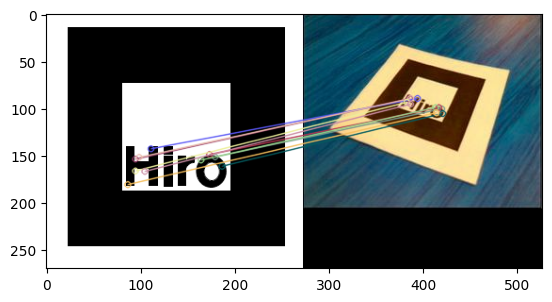

In [15]:
import cv2

# Read images
target_image = cv2.imread('../img/hiro.jpg')
reference_image = cv2.imread('../img/hiro_marker.png')

# Convert images to grayscale
target_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints_target, descriptors_target = orb.detectAndCompute(target_gray, None)
keypoints_reference, descriptors_reference = orb.detectAndCompute(reference_gray, None)

# Create a Brute-Force matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors_target, descriptors_reference)

# Sort matches by their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
matched_image = cv2.drawMatches(target_image, keypoints_target, reference_image, keypoints_reference, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched image
# cv2.imshow('Matched Image', matched_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(matched_image)
plt.show()


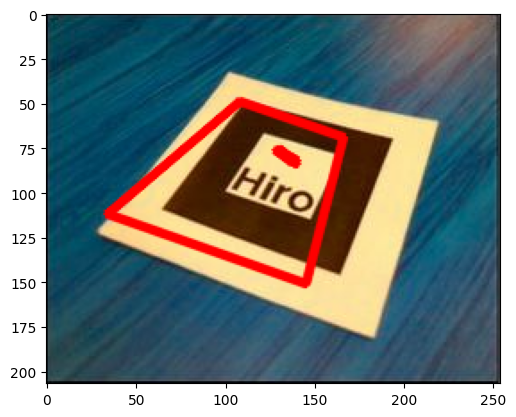

In [23]:

target_point = np.float32([keypoints_target[match.queryIdx].pt for match in matches[:10]]).reshape(-1, 1, 2)
ref_point = np.float32([keypoints_reference[match.trainIdx].pt for match in matches[:10]]).reshape(-1, 1, 2)

homography, _ = cv2.findHomography( target_point, ref_point, cv2.RANSAC, 5.0)


ref_w ,ref_h= reference_image.shape[:2]
ref_point = [[0,0], [0, ref_h-1], [ref_w-1, ref_h-1], [ref_w-1,0]]
ref_point = np.float32(ref_point).reshape(-1,1,2)
transformedCorners = cv2.perspectiveTransform(ref_point, homography)

# Draw a polygon on the second image joining the transformed corners
frame = cv2.polylines(
    reference_image, [np.int32(transformedCorners)], True, 255, 3, cv2.LINE_AA,
)
# Draw a polygon on the second image joining the transformed corners
# frame = cv2.polylines(
#     target_image, [np.int32(transformedCorners)], True, 255, 3, cv2.LINE_AA,
#     )
# cv2.imshow("image", frame)
# cv2.imshow("iamge", aligned_image)
plt.imshow(frame)
plt.show()

In [9]:
print(homography)
print()

[[-4.91789450e+01  9.45956646e+01 -1.27856745e+03]
 [-7.32535416e+01  1.05942239e+02 -6.74499696e+02]
 [-2.97295798e-01  3.92100350e-01  1.00000000e+00]]
[[199 199 199]
 [ 79  79  79]
 [183 183 183]
 ...
 [ 82  82  82]
 [174 174 174]
 [237 237 237]]
